# INTRODUCCIÓN

A lo largo del 2020, al igual que en cualquier otro año, se han llevado a cabo tanto matrimonios como divorcios. Según lo que ocurra cada año pueden cambiar muchas cosas (como, por ejemplo, una pandemia mundial), pero siempre seguirá habiendo tanto matrimonios como divorcios. Por tanto, en el presente trabajo trataré de llevar a cabo un mapa a nivel de España que muestre la proporción de matrimonios y divorcios que se han llevado a cabo en cada provincia en función de la población total española, para así poder ver en qué provincias predominan cada uno de estos.

Para llevar a cabo dicho mapa, inicialmente será necesario obtener todas las plantillas que se utilizarán: países (España y alrededores), península y baleares, mares e Islas Canarias. Será con estas con las que se construirá el mapa en el que se mostrarán los datos de los que se habló anteriormente. Por otra parte, también será necesario recopilar los datos por cada provincia, así como la población total, para poder realizar un índice de estos y compararlos entre ellos. Por último, una vez recopilados los mapas y teniendo todos los datos necesarios, se insertarán los datos de cada provincia en su posición correspondiente. Para poder comparar mejor los datos entre las distintas provincias, se usará una escala de colores, representando las provincias con un índice de matrimonios/divorcios mayor con colores más intensos.

# Librerías
Geopandas es la librería de Python que permite utilizar mapas estáticos

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays 

Las librerías PIL e io son necesarias para la realización de los GIF

In [ ]:
# Evita mostrar salida de esta celda de codigo
%%capture
import pandas as pd
!pip install geopandas
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt

import PIL
import io


# Importación de datos
A continuación se importan los datos desde la plataforma de GitHub, donde los datos geográficos como son la península más las Islas Baleares y las Islas Canarias (que nos sirven para dibujar el mapa final) son del instituto nacional geográfico. Los datos demográficos son de un dataset subido de Excel donde su contenido trata del número de matrimonios, el número de divorcios y el total de la población en el año 2020 en las diferentes provincias.

Las capas de la península y Canarias utilizadas posteriormente se descargan de la página web del <a href='http://centrodedescargas.cnig.es/CentroDescargas/buscar.do?filtro.codFamilia=LILIM&filtro.codCA=11#'> Instituto Geográfico Nacional </a>:

Se descarga una carpeta .zip que, a su vez, contendrá otras carpetas con la información de los límites geográficos de la España peninsular, Islas Baleares, Ceuta y Melilla (carpeta SHP_ETRS89), y de las Islas Canarias (carpeta SHP_WGS84). Asimismo, dentro de cada una de esas dos carpetas, otras con los recintos autonómicos, provinciales y municipales. Se utilizarán las capas de provincias para este estudio.

Como el archivo .shp para las Islas Canarias es distinto al del resto de España, se leen ambos archivos por separado, para, posteriormente, concatenarlos (es decir, juntar ambas tablas una debajo de la otra).

El dataset de Excel contiene las columnas del número de matrimonios, número de divorcios, y total de la población en el año 2020. Estos datos se encuentran en el INE.

El número de matrimonios se encuentra en el siguiente <a href='https://www.ine.es/jaxi/Datos.htm?tpx=50342'>enlace </a>.

El número de <a href='https://www.ine.es/jaxiT3/Datos.htm?t=21550'> divorcios </a>.

La <a href='https://www.ine.es/jaxiT3/Datos.htm?t=21550'> población total </a>.

La población total está compuesta por los datos a fecha de 1 de Enero de 2021 para asegurar tener toda la población actualizada del 2020.


In [ ]:
# Importamos datos geográficos
pen_prov_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula_provincias.zip?raw=true'
can_prov_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias_provincias.zip?raw=true'
canarias = gpd.read_file(can_prov_file)
peninsula_baleares = gpd.read_file(pen_prov_file)
# Importamos datos demograficos
mat_div_prov_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Datasets/Mat_div_Provincias_2020.xlsx?raw=true'
mat_div_gif = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Datasets/Mat_div_Provincias_2016_2020.xlsx?raw=true'
datos = pd.read_excel(mat_div_prov_file, sheet_name='datos') #sheet_name es para escoger la hoja de Excel
datos.sample(3)

,Provincias,Num_mat,Num_div,TotalPob
32,Navarra,1309,1049,657654
20,Girona,1644,1258,773766
12,Cádiz,2472,1956,1258153


## Unión de la península con las islas Canarias
Como tengo importados dos tipos de mapas, necesito unirlos, y para ello uso la siguiente función concatenando las dos partes.
Debido a que hay un territorio que no corresponde a ninguna de las provincias que forman España procedo a eliminarlo porque no tiene nada que ver con mi análisis.


In [ ]:
# Unión de la península con las islas Canarias
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, canarias]))

# Eliminamos los territorios no asociados a ninguna provincia
mapa.drop(43, inplace=True)

## Cálculo de los índices
El objetivo de este análisis es estudiar el número de matrimonios y el número de divorcios respecto a la población total (en concreto en el año 2020). Por ello, se procede a realizar los cálculos correspondientes para establecer los índices, multiplicándolos por mil para hacer una interpretación más sencilla a la hora de interpretar el mapa. De esta forma, los datos que se mostrarán serán los de matrimonios o divorcios en cada una de las provincias por cada mil habitantes.

In [ ]:
# Convertimos a índice los matrimonios y divorcios, multiplicando por mil cada uno de ellos para su mejor interpretación posterior
datos["Indice_mat"]=datos["Num_mat"]/datos["TotalPob"]*1000
datos["Indice_div"]=datos["Num_div"]/datos["TotalPob"]*1000
datos.sample(3)

,Provincias,Num_mat,Num_div,TotalPob,Indice_mat,Indice_div
18,Cuenca,246,205,199004,1.236156,1.030130
8,Barcelona,11396,10077,5639524,2.020738,1.786853
21,Granada,1503,1334,928381,1.618947,1.436910


# Unión del mapa con el dataset
Se establece una unión del dataset con el mapa, donde el elemento común son las provincias. 
Al proceder a la realización del proceso se encontró el problema de que algunas de las provincias tenían distinto nombre, por ejemplo "A Coruña" en un dataset estaba escrita como "Coruña, A" en el otro, por ello se procedió a homogeneizar los datos de las provincias en el dataset para establecer una unión sin fallos.
Las variables finales correspondientes a mi estudio serían "Provincias", "Indice_mat", "Indice_div" y "geometry".

In [ ]:
# Unimos los datos de los índices con el mapa mediante provincias como elemento común
mapa = pd.merge(left=datos,
                right=mapa, 
                left_on='Provincias', 
                right_on='NAMEUNIT')[['Provincias',
                                      'Indice_mat',
                                      'Indice_div',
                                      'geometry']]

#Volvemos a convertirlo en un GeoDataFrame
mapa = gpd.GeoDataFrame(mapa) 
mapa.head()

,Provincias,Indice_mat,Indice_div,geometry
0,Albacete,1.458033,0.992594,"POLYGON ((-2.76208 38.53275, -2.76229 38.53326..."
1,Alacant/Alicante,2.103217,1.691122,"MULTIPOLYGON (((-0.75350 37.87162, -0.75355 37..."
2,Almería,1.638319,1.786752,"MULTIPOLYGON (((-3.03529 35.93767, -3.03539 35..."
3,Araba/Álava,1.628467,1.379800,"POLYGON ((-3.13130 42.75765, -3.13214 42.75779..."
4,Asturias,1.825471,1.674418,"MULTIPOLYGON (((-4.55610 43.39481, -4.55636 43..."


# Representación de los mapas estáticos
Para la representación de los mapas se han dibujado los dos, tanto los de matrimonios como los de divorcios al mismo tiempo, donde para que la representación de los mapas fuera efectiva, se han importado los datos del océano y los países colindantes a España desde gitHub.


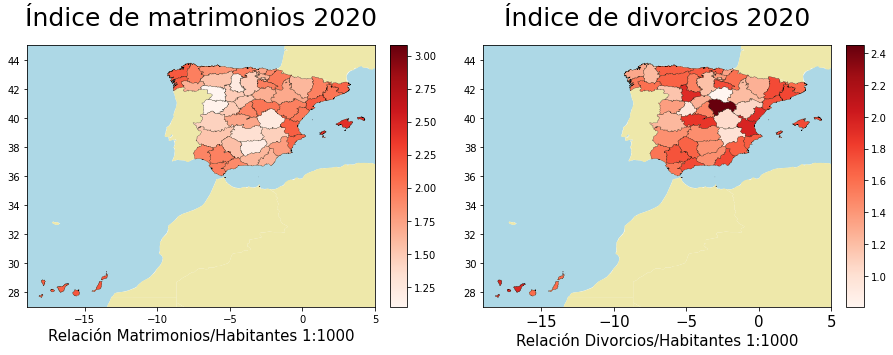

In [ ]:
# Creamos la figura y establecemos su tamaño:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))# Añado el 2 para que salgan 2 gráficos
 
#Establecemos las coordenadas geográficas que queremos representar (es decir, de qué coordenada a qué coordenada queremos mostrar). Primero ponemos las coordenadas de longitud y luego de latitud.
ax1.axis([-19, 5, 27, 45])
ax2.axis([-19, 5, 27, 45])
 
# Título:
ax1.set_title('Índice de matrimonios 2020', 
             pad = 20, #Eleva el título, separándolo del contorno de la figura
             fontdict={'fontsize':25})
ax2.set_title('Índice de divorcios 2020',
              pad = 20,
              fontdict={'fontsize': 25})

ax1.set_xlabel("Relación Matrimonios/Habitantes 1:1000", fontsize=15)
plt.xticks(fontsize=15)

ax2.set_xlabel("Relación Divorcios/Habitantes 1:1000", fontsize=15)
plt.xticks(fontsize=15)

# Añadimos la leyenda separada del mapa:
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes("right",
                         size="5%",
                         pad=0.2) #Para separar la leyenda un poco del mapa

cax2 = divider2.append_axes("right",
                         size="5%",
                         pad=0.2) #Para separar la leyenda un poco del mapa                         

# Dibujamos nuestro mapa de provincias:
mapa.plot(ax=ax1,
           column="Indice_mat",
           cmap="Reds",
           edgecolor="black",
           linewidth=0.2,
           legend=True,
           cax=cax1,
           zorder=5); 
           #Cuanto menor sea este número, más abajo estará la capa. Fijando este número en 5, y las otras dos capas en núumeros menores, 
           #nos aseguramos de que este capa se vea por encima de las otras.

mapa.plot(ax=ax2,
           column="Indice_div",
           cmap="Reds",
           edgecolor="black",
           linewidth=0.2,
           legend=True,
           cax=cax2,
           zorder=5); 

# Cargamos dos capas (uno de mares y oceanos, y otro de los países del mundo) para complementar nuestro mapa:

# Añadimos capa de mares al mapa
# La capa de océanos la hemos obtenido del siguiente enlace: https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/
oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
mapa_oceanos.plot(ax=ax1,
                 color="lightblue",
                 zorder=0);

# Añadimos capa de países
#La capa de países la hemos obtenido del siguiente enlace: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about 
paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
mapa_paises.plot(ax=ax1,
                 color="palegoldenrod",
                 linewidth=0,
                 zorder=2);


# Añadimos capa de mares al mapa
oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
mapa_oceanos.plot(ax=ax2,
                 color="lightblue",
                 zorder=0);

# Añadimos capa de países
paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
mapa_paises.plot(ax=ax2,
                 color="palegoldenrod",
                 linewidth=0,
                 zorder=2);



# Interpretación de los mapas estáticos
Observando los mapas de los índices en el año 2020 vemos que casi no hubo matrimonios respecto a la cantidad de divorcios sucedidos.
En concreto destaca Guadalajara como la provincia de más divorcios en ese año mientras que las que más matrimonios tuvieron fueron las islas Baleares.
Soria fue donde menos cantidad de divorcios hubo, mientras que con pocos matrimonios tenemos a Zamora, Salamanca, Palencia, Cuenca y Jaén.
La escala se mediría, en matrimonios, en k matrimonios por cada mil habitantes, y lo mismo para divorcios.


#GIF 
Se van a realizar dos GIF mediante la sucesión de varios mapas estáticos. Anteriormente se realizaron 2 mapas estáticos de los matrimonios y divorcios respecto al total de la población en el año 2020, en este apartado se va a hacer lo mismo pero estos GIF contendrán los años desde el 2016 hasta el 2020.





El dataset de Excel que viene a continuación, subido a la plataforma GitHub, contiene las columnas del número de matrimonios, número de divorcios, y total de la población desde el año 2016 hasta el 2020. Estos datos se encuentran en el INE, cuyos enlaces son los mismos que se adjuntaron anteriormente para el 2020.


In [ ]:
#Manteniendo las columnas Codigo y Provincias 
datos_gif = pd.read_excel(mat_div_gif, sheet_name='datos_gif')
datos_gif.sample(3)

,Provincias,Num_mat_2016,Num_mat_2017,Num_mat_2018,Num_mat_2019,Num_mat_2020,Num_div_2016,Num_div_2017,Num_div_2018,Num_div_2019,Num_div_2020,TotalPob_2016,TotalPob_2017,TotalPob_2018,TotalPob_2019,TotalPob_2020
31,Murcia,5177,5215,5224,5093,2689,2940,3075,2958,2699,2528,1472977,1475569,1487663,1504869,1513076
0,Albacete,1429,1383,1294,1228,567,727,724,639,575,386,391574,390337,389528,389874,388880
19,Gipuzkoa,2554,2656,2554,2561,1366,1157,1156,1195,1214,952,708979,710281,713007,716552,716279


## Cálculo de los índices
Como en la elaboración del anterior mapa se realizaron los índices de matrimonios y divorcios para el año 2020, en este caso se hiceron para los años que abarcan la longitud desde el año 2016 hasta el 2020.

In [ ]:
# Convertimos a índice los matrimonios y divorcios, multiplicando por mil cada uno de ellos para su mejor interpretación posterior
datos_gif["Indice_matrimonios_2016"]=datos_gif["Num_mat_2016"]/datos_gif["TotalPob_2016"]*1000
datos_gif["Indice_divorcios_2016"]=datos_gif["Num_div_2016"]/datos_gif["TotalPob_2016"]*1000
datos_gif["Indice_matrimonios_2017"]=datos_gif["Num_mat_2017"]/datos_gif["TotalPob_2017"]*1000
datos_gif["Indice_divorcios_2017"]=datos_gif["Num_div_2017"]/datos_gif["TotalPob_2017"]*1000
datos_gif["Indice_matrimonios_2018"]=datos_gif["Num_mat_2018"]/datos_gif["TotalPob_2018"]*1000
datos_gif["Indice_divorcios_2018"]=datos_gif["Num_div_2018"]/datos_gif["TotalPob_2018"]*1000
datos_gif["Indice_matrimonios_2019"]=datos_gif["Num_mat_2019"]/datos_gif["TotalPob_2019"]*1000
datos_gif["Indice_divorcios_2019"]=datos_gif["Num_div_2019"]/datos_gif["TotalPob_2019"]*1000
datos_gif["Indice_matrimonios_2020"]=datos_gif["Num_mat_2020"]/datos_gif["TotalPob_2020"]*1000
datos_gif["Indice_divorcios_2020"]=datos_gif["Num_div_2020"]/datos_gif["TotalPob_2020"]*1000
datos.sample(3)

,Provincias,Num_mat,Num_div,TotalPob
27,Lleida,850,772,436730
33,Ourense,505,488,305151
17,A Coruña,2441,1476,1121757


# Unión del mapa con el dataset del 2016 al 2020
Se establece una unión de la tabla con los datos del mapa (empleada también para realizar los mapas estáticos anteriormente) junto con los índices de matrimonios y divorcios realizados para los años desde el 2016 hasta el 2020. Esta unión se hace mediante el elemento común de ambas tablas, es decir, las provincias. 


In [ ]:
mapa2 = pd.merge(left=datos_gif,
                right=mapa, 
                left_on='Provincias', 
                right_on='Provincias')[[
                                        'Provincias',
                                        'geometry',
                                        'Indice_matrimonios_2016',
                                        'Indice_matrimonios_2017',
                                        'Indice_matrimonios_2018',
                                        'Indice_matrimonios_2019',
                                        'Indice_matrimonios_2020',
                                        'Indice_divorcios_2016',
                                        'Indice_divorcios_2017',
                                        'Indice_divorcios_2018',
                                        'Indice_divorcios_2019',
                                        'Indice_divorcios_2020'
                ]]
mapa2.sample(3)

,Provincias,geometry,Indice_matrimonios_2016,Indice_matrimonios_2017,Indice_matrimonios_2018,Indice_matrimonios_2019,Indice_matrimonios_2020,Indice_divorcios_2016,Indice_divorcios_2017,Indice_divorcios_2018,Indice_divorcios_2019,Indice_divorcios_2020
4,Asturias,"MULTIPOLYGON (((-4.55610 43.39481, -4.55636 43...",3.603483,3.536313,3.399514,3.272159,1.825471,2.189936,2.191463,2.032860,2.056141,1.674418
3,Araba/Álava,"POLYGON ((-3.13130 42.75765, -3.13214 42.75779...",3.492767,3.346237,3.411844,3.128477,1.628467,2.022779,1.728378,1.593008,1.543018,1.379800
20,Girona,"MULTIPOLYGON (((2.81592 41.68222, 2.81592 41.6...",3.828276,3.848432,3.738629,3.773000,2.124673,2.093274,2.226354,2.102979,1.994021,1.625815


Para la realización del GIF es necesaria la representación de los mapas estáticos, donde en este caso se realiza para los matrimonios desde el 2016 hasta el 2020.

In [ ]:
%%capture
mapa2 = gpd.GeoDataFrame(mapa2)

#Creamos la lista de fotogramas vacía:
fotogramas = []

#Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa2.columns.to_list()[2:7]:
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-19, 7, 25, 48]) 
    #Título y ejes:
    ax.set_title(fechas, 
                  pad = 20, #Eleva el título, separándolo del contorno de la figura
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Relación Matrimonios/Habitantes 1:1000", fontsize=20)
    plt.xticks(fontsize=15)
    plt.grid(True, zorder=0)


    #Añadimos la leyenda separada del mapa:
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) #Para separar la leyenda un poco del mapa

    #Dibujamos nuestro mapa de provincias:
    mapa2.plot(ax=ax,
               column=fechas, #IMPORTANTE: en este caso, no queremos representar una sola columna, sino cada una de las columnas que sobre las que vaya pasando el bucle for y que están dentro de nuestra lista de columnas
               cmap="Reds",
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               norm=plt.Normalize(vmin=0, vmax=5), #IMPORTANTE: esta opción, que antes no hemos necesitado usar, la empleamos para que la escala de medida sea la misma en todos los mapas (en nuestro caso va a ir de 0 a 40).
               cax=cax,
               zorder=5); #Cuanto menor sea este número, más abajo estará la capa. Fijando este número en 5, y las otras dos capas en núumeros menores, nos aseguramos de que este capa se vea por encima de las otras.

    #Cargamos dos capas (uno de mares y oceanos, y otro de los países del mundo) para complementar nuestro mapa:
    # La capa de océanos la hemos obtenido del siguiente enlace: https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/
    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);

    # Añadimos capa de países
    #La capa de países la hemos obtenido del siguiente enlace: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                    color="palegoldenrod",
                    linewidth=0,
                    zorder=2);
  
    #Parte 1 para la creación del GIF:
    #import PIL
    #import io
    f = io.BytesIO() #Creamos un objeto que va a contener elementos binarios (compuestos internamente por ceros y unos)
    imagen = ax.get_figure() #Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, #Guadamos la información de cada mapa
                   format="png", #Guardamos los mapas en formato .png
                   bbox_inches="tight") #Esta línea de código se utiliza para que el contorno de las imágenes se ajusten al tamaño del mapa
    f.seek(0) #Inicializamos el objeto con información binaria
    fotogramas.append(PIL.Image.open(f)) # con append() vamos añadiendo cada mapa a la lista de fotogramas.

#IMPORTANTE: ya estamos fuera del bucle:
fotogramas[0].save("Mapa dinámico Índice de matrimonios por Provincias.gif", #Damos nombre al archivo
                   format="GIF", #Vamos a crear un GIF
                   append_images = fotogramas[1:], #Añadimos los mapas de la lista fotogramas (empezamos por el segundo (número 1), porque el primero (número 0) ya lo hemos añadido)
                   save_all = True,
                   duration = 1200, #Duración en milisegundos del GIF
                   loop=0) #Con esta opción hacemos que, una vez que el GIF acabe, vuelva a empezar, y así indefinidamente.

f.close() #Cerramos el archivo binario (ya no se puede modificar)

# GIF matrimonios
Al guardar los datos en los archivos de colab se puede representar finalmente el GIF.

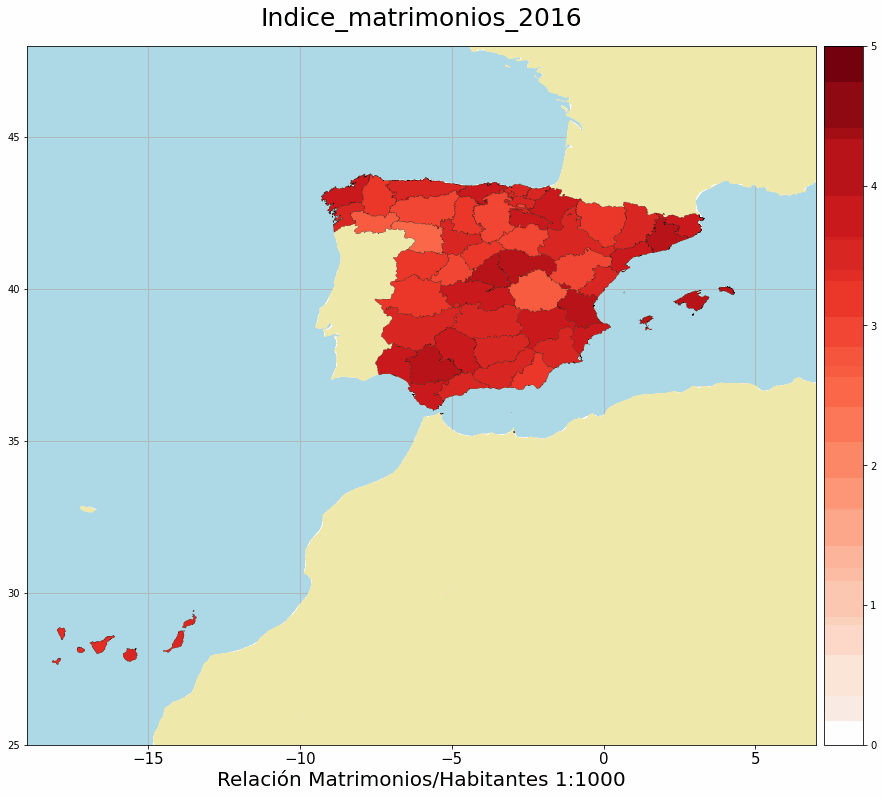

In [ ]:
from IPython.display import Image
#from matplotlib import animation
Image(open("/content/Mapa dinámico Índice de matrimonios por Provincias.gif", "rb").read())

# Interpretación GIF matrimonios
El GIF nos muestra las provincias en los distintos años. Como era de esperar en el año de la pandemia (2020) hay un menor número de matrimonios respecto a los años anteriores.
Observando los años anteriores al Covid se establecen un mayor número de matrimonios en las zonas de costa, en el centro de España y en las Islas Baleares. Esto puede deberse, entre otros factores, a un predominio de gente joven frente a gente adulta, pues la edad media de matrimonio en España está en torno a los 35 años. Por otra parte, la razón de que existan zonas que se diferencia por una cantidad de matrimonio mucho más bajo puede ser por el predominio de la población adulta, ya casada. Esto puede relacionarse, a su vez, con las oportunidades económicas: aquellas regiones con mayores oportunidades atraerán a más gente joven, propiciando el aumento de gente joven y, a su vez, la cantidad de matrimonios, mientras aquellas con menos oportunidades serán las que sufran la fuga de la gente joven.

Para la realización del GIF de divorcios se representan los mapas estáticos desde el 2016 hasta el 2020.

In [ ]:
%%capture
#Creamos la lista de fotogramas vacía:
fotogramas = []

#Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa2.columns.to_list()[7:]:
#IMPORTANTE: los elementos que metamos dentro de un bucle, deben estar indexados (metidas las líneas un poco hacia adentro) para indicarle a Python que se encuentran dentro del bucle:

    #El código para crear los mapas es casi idéntico al que hemos empleado arriba para crear un solo mapa:

    #Creamos la figura y establecemos su tamaño:
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
    #Establecemos las coordenadas geográficas que queremos representar (es decir, de qué coordenada a qué coordenada queremos mostrar). Primero ponemos las coordenadas de longitud y luego de latitud.
    ax.axis([-19, 7, 25, 48]) 
 
    #Título y ejes:
    ax.set_title(fechas, 
                  pad = 20, #Eleva el título, separándolo del contorno de la figura
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Relación Divorcios/Habitantes 1:1000", fontsize=20)
    plt.xticks(fontsize=15)
    plt.grid(True, zorder=0)


    #Añadimos la leyenda separada del mapa:
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) #Para separar la leyenda un poco del mapa

    #Dibujamos nuestro mapa de provincias:
    mapa2.plot(ax=ax,
               column=fechas, #IMPORTANTE: en este caso, no queremos representar una sola columna, sino cada una de las columnas que sobre las que vaya pasando el bucle for y que están dentro de nuestra lista de columnas
               cmap="Reds",
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               norm=plt.Normalize(vmin=0, vmax=5), #IMPORTANTE: esta opción, que antes no hemos necesitado usar, la empleamos para que la escala de medida sea la misma en todos los mapas (en nuestro caso va a ir de 0 a 40).
               cax=cax,
               zorder=5); #Cuanto menor sea este número, más abajo estará la capa. Fijando este número en 5, y las otras dos capas en núumeros menores, nos aseguramos de que este capa se vea por encima de las otras.

    #Cargamos dos capas (uno de mares y oceanos, y otro de los países del mundo) para complementar nuestro mapa:
    # La capa de océanos la hemos obtenido del siguiente enlace: https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/
    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);

    # Añadimos capa de países
    #La capa de países la hemos obtenido del siguiente enlace: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                    color="palegoldenrod",
                    linewidth=0,
                    zorder=2);
  
    #Parte 1 para la creación del GIF:
    #import PIL
    #import io
    f = io.BytesIO() #Creamos un objeto que va a contener elementos binarios (compuestos internamente por ceros y unos)
    imagen = ax.get_figure() #Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, #Guadamos la información de cada mapa
                   format="png", #Guardamos los mapas en formato .png
                   bbox_inches="tight") #Esta línea de código se utiliza para que el contorno de las imágenes se ajusten al tamaño del mapa
    f.seek(0) #Inicializamos el objeto con información binaria
    fotogramas.append(PIL.Image.open(f)) # con append() vamos añadiendo cada mapa a la lista de fotogramas.

#IMPORTANTE: ya estamos fuera del bucle:
fotogramas[0].save("Mapa dinámico Índice de divorcios por Provincias.gif", #Damos nombre al archivo
                   format="GIF", #Vamos a crear un GIF
                   append_images = fotogramas[1:], #Añadimos los mapas de la lista fotogramas (empezamos por el segundo (número 1), porque el primero (número 0) ya lo hemos añadido)
                   save_all = True,
                   duration = 1200, #Duración en milisegundos del GIF
                   loop=0) #Con esta opción hacemos que, una vez que el GIF acabe, vuelva a empezar, y así indefinidamente.

f.close() #Cerramos el archivo binario (ya no se puede modificar)

#GIF divorcios
Con el código a continuación se visualizan los divorcios del GIF guardados en los archivos de colab.

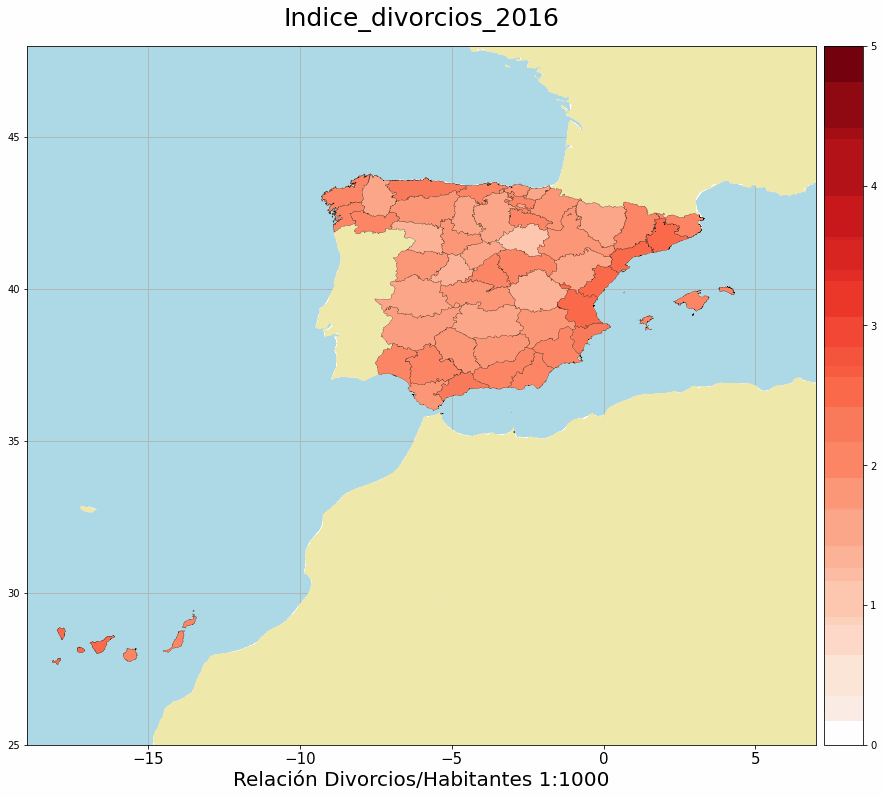

In [ ]:
from IPython.display import Image
#from matplotlib import animation
Image(open("/content/Mapa dinámico Índice de divorcios por Provincias.gif", "rb").read())

# Interpretación GIF divorcios
Como se interpretó en los matrimonios el año de la pandemia fue el que menos cantidad hubo respecto a los años anteriores, pero analizando los años anteriores a la pandemia, lo primero a destacar es concretamente que desde el año 2018 hasta el 2020 la provincia de Guadalajara ha sido la de mayor número de divorcios con gran diferencia respecto al resto durante estos tres años. Sería interesante estudiar si esto es una mera coincidencia o ha ocurrido algo en los últimos años (quiebre de grandes empresas, inestabilidad económica de la región ...) que haya propiciado el despunte de los divorcios respecto a las demás comunidades durante varios años.
